In [178]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import pandas_datareader
import datetime as dt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

In [181]:
def generate_data(index_saham,start,end):
    data_all = pandas_datareader.data.DataReader(index_saham,'yahoo',start,end)
    data_all.reset_index(inplace=True)
    x_all = pd.DataFrame(data_all.Date.astype(str).str.split('-').tolist(),columns="year month date".split())
    y_all = data_all.Close
    return x_all, y_all, data_all
start_date = dt.datetime(2014, 8, 21)
end_date = dt.datetime.now()
x_all, y_all, data_all = generate_data('SPY', start_date, end_date)
data_all

,Date,High,Low,Open,Close,Volume,Adj Close
0,2014-08-20,199.160004,198.080002,198.119995,198.919998,72763000.0,178.436493
1,2014-08-21,199.759995,198.929993,199.089996,199.500000,67791000.0,178.956802
2,2014-08-22,199.690002,198.740005,199.339996,199.190002,76107000.0,178.678726
3,2014-08-25,200.589996,199.149994,200.139999,200.199997,63855000.0,179.584702
4,2014-08-26,200.820007,200.279999,200.330002,200.330002,47298000.0,179.701324
...,...,...,...,...,...,...,...
1348,2019-12-27,323.799988,322.279999,323.739990,322.859985,42528800.0,322.859985
1349,2019-12-30,323.100006,320.549988,322.950012,321.079987,49729100.0,321.079987
1350,2019-12-31,322.130005,320.149994,320.529999,321.859985,57077300.0,321.859985
1351,2020-01-02,324.890015,322.529999,323.540009,324.869995,59151200.0,324.869995


In [182]:
def tranformasi_data(x_all,x_tr):
    scaler = StandardScaler()
    scaler.fit(x_all)
    x_all_tr = scaler.transform(x_tr)
    return x_all_tr

x_all_tr = tranformasi_data(x_all, x_all)

In [183]:
def model(x_all_tr, y_all):
    gcs = GridSearchCV(SVR(kernel='rbf'),param_grid={'gamma': [5, 6, 7, 8, 9, 10]},cv=5,scoring='neg_mean_squared_error')
    grid_result = gcs.fit(x_all_tr, y_all)
    best_params = grid_result.best_params_
    best_svr = SVR(kernel='rbf', C=1e3, gamma=best_params["gamma"])
    best_svr.fit(x_all_tr, y_all)
    y_pred = best_svr.predict(x_all_tr)
    return y_pred, best_svr

y_pred, best_svr = model(x_all_tr, y_all)

/home/rama/.local/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


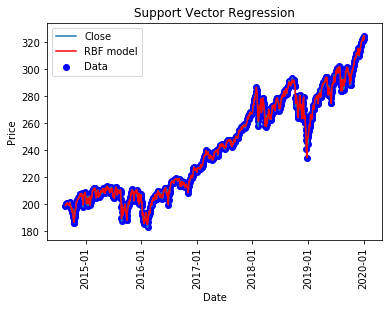

In [184]:
def plot(y_pred, data_all):
    fig, ax = plt.subplots()
    plt.plot(data_all.Date, data_all.Close)
    monthyearFmt = mdates.DateFormatter('%Y-%m')
    ax.xaxis.set_major_formatter(monthyearFmt)
    _ = plt.xticks(rotation=90)
#     ax.xaxis_date()
    
    plt.plot(data_all.Date, y_pred, c='r', label='RBF model')
    plt.scatter(data_all.Date, data_all.Close, c='b', label='Data')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title('Support Vector Regression')
    plt.legend()
    plt.show()
plot(y_pred, data_all)

In [185]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print('MSE: {0:.3f}'.format(mean_squared_error(y_all, y_pred)))
print('MAE: {0:.3f}'.format(mean_absolute_error(y_all, y_pred)))
print('R^2: {0:.3f}'.format(r2_score(y_all, y_pred)))

MSE: 0.595
MAE: 0.352
R^2: 1.000


In [186]:
prediksi_tanggal = '2020-01-06'
y, m, d = prediksi_tanggal.split('-')
c = [[y, m, d]]
c_tr = tranformasi_data(x_all, c)
best_svr.predict(c_tr)

array([277.02175688])